In [66]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read CSVs and Create Dataframes

In [67]:
# Import Data
baseball2024_file = "https://raw.githubusercontent.com/csc442-team11/MLB-Data-Analysis/refs/heads/main/Datasets/mlb-player-stats-Batters-2024-dirty.csv"
baseball2023_file = "https://raw.githubusercontent.com/csc442-team11/MLB-Data-Analysis/refs/heads/main/Datasets/mlb-player-stats-Batters-2023-dirty.csv"

# Create dataframes
df_2023 = pd.read_csv(baseball2023_file)
df_2024 = pd.read_csv(baseball2024_file)


# Add the year column
df_2023['Year'] = 2023
df_2023['Year'] = df_2023['Year'].astype('category')

df_2024['Year'] = 2024
df_2024['Year'] = df_2024['Year'].astype('category')

### Data Dictionary
| Variable               | Description
|------------------------|----------------------------------------------------
| Player                 | First and last name
| Year                   | The year these stats are from
| Team                   | Team name abreviation
| Pos                    | Position abbreviation
| Age                    | Number of years lived
| G (Games)              | Number of games played
| AB (At bat)            | Number of at bats
| PA (Plate Appearance)  | Number of times a player went to the plate
| R (Run)                | Number of runs scored
| H (Hit)                | Number of hits
| 2B (2nd Base)          | Number of doubles
| 3B (3rd Base)          | Number of triples
| HR (Home Run)          | Number of home runs
| RBI (Runs Batted In)   | Number of run scored from player's plate appearance
| SB (Stolen Bases)      | Number of advances to a base the player isn't allowed
| CS (Caught Stealing)   | Number of times a player is tagged while attempting to steal a base
| BB (Base on Balls)     | Number of times a player advances to first base without swinging
| SO (Strikeout)         | Number of strikeouts
| SH (Sacrifice Bunt)    | Number of bunts where the batter is thrown out but advances the runner
| SF (Sacrifice Fly)     | Number of fly-balls where the batter is caught out but advances the runner
| HBP (Hit-by-Pitch)     | Number of times struck by a pitched ball without swinging
| AVG (Average)          | Hits divided by total at-bats
| OBP (On-base Average)  | Number of times on base divided by the number of plate appearances
| SLG (Slugging Percentage) | Total number of bases a player records per at-bat
| OPS (On-base plus Slugging) | Combination of on-base percentage and slugging percentage

# Data Cleaning

## Rectify Structural Misalignments

In [68]:
# Check the shape of the data
print("2023 Stats Shape")
print(df_2023.shape)

print("\n2024 Stats Shape")
print(df_2024.shape)

2023 Stats Shape
(705, 24)

2024 Stats Shape
(725, 24)


The PA column is missing. That is because it requires data from a column that currently contains missing values, so we need to fix that issue before computing the PA column

In [5]:
# Check that columns are named appropriately and for convience; match data dictionary
print("2023 Column Labels")
print(df_2023.columns)

print("\n2024 Column Labels")
print(df_2024.columns)

2023 Column Labels
Index(['Player', 'Team', 'Pos', 'Age', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG',
       'OPS', 'Year'],
      dtype='object')

2024 Column Labels
Index(['Player', 'Team', 'Pos', 'Age', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG',
       'OPS', 'Year'],
      dtype='object')


## Data Uniqueness
There are roughly 650 players (not including pitchers) in the MLB at any given time, so we should expect their to be roughly that many unique entries.

There are 7 batting positions (DH, 1B, 2B, 3B, SS, C, OF)

There are 30 teams in the MLB

In [69]:
# Find the columns that are unique to each player
print("2023 stats unique players and teams")
print(f"Players: {len(df_2023['Player'].unique())}")
print(f"Positions: {len(df_2023['Pos'].unique())}")
print(f"Teams: {len(df_2023['Team'].unique())}")


print("\n2024 stats unique players and teams")
print(f"Players: {len(df_2024['Player'].unique())}")
print(f"Positions: {len(df_2024['Pos'].unique())}")
print(f"Teams: {len(df_2024['Team'].unique())}")

2023 stats unique players and teams
Players: 649
Positions: 7
Teams: 30

2024 stats unique players and teams
Players: 649
Positions: 7
Teams: 30


## Dealing with Missing Values


In [ ]:
# Find columns with missing values
print(df_2023.info())
print(df_2024.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Player  705 non-null    object  
 1   Team    705 non-null    object  
 2   Pos     705 non-null    object  
 3   Age     705 non-null    int64   
 4   G       679 non-null    float64 
 5   AB      705 non-null    int64   
 6   R       705 non-null    int64   
 7   H       705 non-null    int64   
 8   2B      705 non-null    int64   
 9   3B      705 non-null    int64   
 10  HR      705 non-null    int64   
 11  RBI     705 non-null    int64   
 12  SB      705 non-null    int64   
 13  CS      705 non-null    int64   
 14  BB      705 non-null    int64   
 15  SO      705 non-null    int64   
 16  SH      686 non-null    float64 
 17  SF      677 non-null    float64 
 18  HBP     705 non-null    int64   
 19  AVG     705 non-null    float64 
 20  OBP     705 non-null    float64 
 21  SLG     705 non-

Games (G), Sacrifice Flies (SF) and Sacrifice Bunts (SH) are the three columns with missing values.

This is done before ensuring column consistency, because some of these operations change the type to an undesired type, so that step comes after this for efficiency.

In [70]:
# Sacrifice Flies (SF) and Sacrifice Bunts (SH) are not significant in a player's
# overall batting strength, so missing values are replaced by 0.
df_2023['SF'] = df_2023['SF'].fillna(0)
df_2023['SH'] = df_2023['SH'].fillna(0)
df_2024['SF'] = df_2024['SF'].fillna(0)
df_2024['SH'] = df_2024['SH'].fillna(0)

# Since the above missing values have been dealt with, we can add plate appearances (PA)
df_2023['PA'] = df_2023['AB'] + df_2023['BB'] + df_2023['HBP'] + df_2023['SF']
df_2024['PA'] = df_2024['AB'] + df_2024['BB'] + df_2024['HBP'] + df_2024['SF']

# Most players have around 4 PA's per game, so to find a player's games played (G),
# we divide PA by 4 and round up (in case someone has less than 4 PA).
# We must make sure the result is not greater than 162, which is the total
# number of games played in a season
df_2023['G'] = df_2023['PA'] / 4
df_2023['G'] = df_2023['G'].apply(np.ceil)
df_2023['G'] = df_2023['G'].apply(lambda x: min(162, x))

df_2024['G'] = df_2024['PA'] / 4
df_2024['G'] = df_2024['G'].apply(np.ceil)
df_2024['G'] = df_2024['G'].apply(lambda x: min(162, x))


print(df_2023.info())
print(df_2024.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Player  705 non-null    object  
 1   Team    705 non-null    object  
 2   Pos     705 non-null    object  
 3   Age     705 non-null    int64   
 4   G       705 non-null    float64 
 5   AB      705 non-null    int64   
 6   R       705 non-null    int64   
 7   H       705 non-null    int64   
 8   2B      705 non-null    int64   
 9   3B      705 non-null    int64   
 10  HR      705 non-null    int64   
 11  RBI     705 non-null    int64   
 12  SB      705 non-null    int64   
 13  CS      705 non-null    int64   
 14  BB      705 non-null    int64   
 15  SO      705 non-null    int64   
 16  SH      705 non-null    float64 
 17  SF      705 non-null    float64 
 18  HBP     705 non-null    int64   
 19  AVG     705 non-null    float64 
 20  OBP     705 non-null    float64 
 21  SLG     705 non-

## Duplicate Values
Here, we merge on the player, summing all integers together.
Then, the averages (AVG, OBP, SLG, OPS) must be computed using these new summed values. Every entry should represent a unique player now with each player's stats being aggregated across all teams they played for in the given 2023 or 2024 season.

The team is omitted for 2023 but kept for 2024. This is to ensure each entry describes the player on the most recent team.

In [71]:
# Group the dataframes by Player and sum all non-average statistics.
df_2023_merged = df_2023.groupby('Player').agg({
    'Year': 'first',
    'Pos': 'last',
    'Age': 'last',
    'G': 'sum',
    'PA': 'sum',
    'AB': 'sum',
    'R': 'sum',
    'H': 'sum',
    '2B': 'sum',
    '3B': 'sum',
    'HR': 'sum',
    'RBI': 'sum',
    'SB': 'sum',
    'CS': 'sum',
    'BB': 'sum',
    'SO': 'sum',
    'SH': 'sum',
    'SF': 'sum',
    'HBP': 'sum',
}).reset_index()

# For 2024, since these teams are the most recent, we'll include them here
# when we merge 2023 and 2024, this team will be included.
df_2024_merged = df_2024.groupby('Player').agg({
    'Team': 'last',
    'Year': 'first',
    'Pos': 'last',
    'Age': 'last',
    'G': 'sum',
    'PA': 'sum',
    'AB': 'sum',
    'R': 'sum',
    'H': 'sum',
    '2B': 'sum',
    '3B': 'sum',
    'HR': 'sum',
    'RBI': 'sum',
    'SB': 'sum',
    'CS': 'sum',
    'BB': 'sum',
    'SO': 'sum',
    'SH': 'sum',
    'SF': 'sum',
    'HBP': 'sum',
}).reset_index()

# We may have merged a player with estimated games played, so we need to make sure
# his aggregate games < 163
df_2023_merged['G'] = df_2023_merged['G'].apply(lambda x: min(162, x))
df_2024_merged['G'] = df_2024_merged['G'].apply(lambda x: min(162, x))

In [72]:
# Used the merged data to compute the various average metrics
df_2023_merged['AVG'] = (df_2023_merged['H'] / df_2023_merged['AB']).round(3)
df_2023_merged['OBP'] = ((df_2023_merged['BB'] + df_2023_merged['HBP'] + df_2023_merged['H']) / df_2023_merged['PA']).round(3)
df_2023_merged['SLG'] = ((df_2023_merged['H'] + df_2023_merged['2B'] + 2 * df_2023_merged['3B'] + 3 * df_2023_merged['HR']) / df_2023_merged['AB']).round(3)
df_2023_merged['OPS'] = df_2023_merged['OBP'] + df_2023_merged['SLG']

df_2024_merged['AVG'] = (df_2024_merged['H'] / df_2024_merged['AB']).round(3)
df_2024_merged['OBP'] = ((df_2024_merged['BB'] + df_2024_merged['HBP'] + df_2024_merged['H']) / df_2024_merged['PA']).round(3)
df_2024_merged['SLG'] = ((df_2024_merged['H'] + df_2024_merged['2B'] + 2 * df_2024_merged['3B'] + 3 * df_2024_merged['HR']) / df_2024_merged['AB']).round(3)
df_2024_merged['OPS'] = df_2024_merged['OBP'] + df_2024_merged['SLG']

# Sanity check, enusre no new null values, and only unique entries (649)
print(df_2023_merged.info())
print(df_2024_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Player  649 non-null    object  
 1   Year    649 non-null    category
 2   Pos     649 non-null    object  
 3   Age     649 non-null    int64   
 4   G       649 non-null    float64 
 5   PA      649 non-null    float64 
 6   AB      649 non-null    int64   
 7   R       649 non-null    int64   
 8   H       649 non-null    int64   
 9   2B      649 non-null    int64   
 10  3B      649 non-null    int64   
 11  HR      649 non-null    int64   
 12  RBI     649 non-null    int64   
 13  SB      649 non-null    int64   
 14  CS      649 non-null    int64   
 15  BB      649 non-null    int64   
 16  SO      649 non-null    int64   
 17  SH      649 non-null    float64 
 18  SF      649 non-null    float64 
 19  HBP     649 non-null    int64   
 20  AVG     649 non-null    float64 
 21  OBP     649 non-

## Standardize Data Formats

In [73]:
# create a list of the columns that are categorical and those that are integer and those that have string values
numerical23 = []
categorical23 = []
string23 = []

# sort the columns based on numerical, categorical, and string
print("2023 data types stats")
for column in df_2023_merged.columns:
  print(df_2023_merged[column].dtype)
  # numerical are floats and ints
  if df_2023_merged[column].dtype == np.float64 or df_2023_merged[column].dtype == np.int64:
   numerical23.append(column)
  # categories are 30 or less unique values
  elif df_2023_merged[column].nunique() < 31:
    categorical23.append(column)
  # remaining are strings
  else:
    string23.append(column)

print("Numerical columns: ", numerical23)
print("Categorical columns: ", categorical23)
print("String columns: ", string23)

numerical24 = []
categorical24 = []
string24 = []
print("\n2024 data type stats")

# sort the columns based on numerical, categorical, and string
for column in df_2024_merged.columns:
  # numerical are floats and ints
  if df_2024_merged[column].dtype == np.float64 or df_2024_merged[column].dtype == np.int64:
   numerical24.append(column)
  # categories are 30 or less unique values
  elif df_2024_merged[column].nunique() < 31:
    categorical24.append(column)
  # remaining are strings
  else:
    string24.append(column)

print("Numerical columns: ", numerical24)
print("Categorical columns: ", categorical24)
print("String columns: ", string24)


2023 data types stats
object
category
object
int64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
int64
float64
float64
float64
float64
Numerical columns:  ['Age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG', 'OPS']
Categorical columns:  ['Year', 'Pos']
String columns:  ['Player']

2024 data type stats
Numerical columns:  ['Age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'SH', 'SF', 'HBP', 'AVG', 'OBP', 'SLG', 'OPS']
Categorical columns:  ['Team', 'Year', 'Pos']
String columns:  ['Player']


In [74]:
# Convert all the columns in the categorical list to be of the type category
for column in categorical23:
  df_2023_merged[column] = df_2023_merged[column].astype('category')

print("\n2023 stats categorical values")
print(df_2023_merged.info())


for column in categorical24:
  df_2024_merged[column] = df_2024_merged[column].astype('category')

print("\n2024 stats categorical values")
print(df_2024_merged.info())


2023 stats categorical values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Player  649 non-null    object  
 1   Year    649 non-null    category
 2   Pos     649 non-null    category
 3   Age     649 non-null    int64   
 4   G       649 non-null    float64 
 5   PA      649 non-null    float64 
 6   AB      649 non-null    int64   
 7   R       649 non-null    int64   
 8   H       649 non-null    int64   
 9   2B      649 non-null    int64   
 10  3B      649 non-null    int64   
 11  HR      649 non-null    int64   
 12  RBI     649 non-null    int64   
 13  SB      649 non-null    int64   
 14  CS      649 non-null    int64   
 15  BB      649 non-null    int64   
 16  SO      649 non-null    int64   
 17  SH      649 non-null    float64 
 18  SF      649 non-null    float64 
 19  HBP     649 non-null    int64   
 20  AVG     649 non-null   

## Numerical Column Constistency
The three columns with missing values should be integers, so we ensure that here.

PA must also be converted

In [75]:
# Converting missing rows values from float to int

# Number of games, SH, SF, and PA should be an int
print("2023 stats updated types")
df_2023_merged['G'] = df_2023_merged['G'].astype('int64')
df_2023_merged['SH'] = df_2023_merged['SH'].astype('int64')
df_2023_merged['SF'] = df_2023_merged['SF'].astype('int64')
df_2023_merged['PA'] = df_2023_merged['PA'].astype('int64')

print(df_2023_merged.info())

# Number of games, SH, and SF should be an int
print("2024 stats updated types")
df_2024_merged['G'] = df_2024_merged['G'].astype('int64')
df_2024_merged['SH'] = df_2024_merged['SH'].astype('int64')
df_2024_merged['SF'] = df_2024_merged['SF'].astype('int64')
df_2024_merged['PA'] = df_2024_merged['PA'].astype('int64')

print(df_2024_merged.info())

2023 stats updated types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Player  649 non-null    object  
 1   Year    649 non-null    category
 2   Pos     649 non-null    category
 3   Age     649 non-null    int64   
 4   G       649 non-null    int64   
 5   PA      649 non-null    int64   
 6   AB      649 non-null    int64   
 7   R       649 non-null    int64   
 8   H       649 non-null    int64   
 9   2B      649 non-null    int64   
 10  3B      649 non-null    int64   
 11  HR      649 non-null    int64   
 12  RBI     649 non-null    int64   
 13  SB      649 non-null    int64   
 14  CS      649 non-null    int64   
 15  BB      649 non-null    int64   
 16  SO      649 non-null    int64   
 17  SH      649 non-null    int64   
 18  SF      649 non-null    int64   
 19  HBP     649 non-null    int64   
 20  AVG     649 non-null    float

## Merging Datasets
We perform a left merge to ensure that all player entries contain their most recent team. The 2023 dataset had its "team" column removed to make this easier. We have to remove players from 2023 that are not in 2024, indicating they are no longer in the MLB.

In [76]:
# Remove players no longer in 2024
df_2023_merged = df_2023_merged[df_2023_merged["Player"].isin(df_2024_merged["Player"])]

# Replace 2023 team data with 2024 team data
df_2023_merged = df_2023_merged.merge(df_2024_merged[["Player", "Team"]], on="Player", how="left")

# Concatenate the two sets together
df_merged = pd.concat([df_2023_merged, df_2024_merged], ignore_index=True)

## Filtering
We first want to check for AVG outliers. Since most statistics either contribute to or are correlated to this value, removing these should produce a more representative sample. Additionally, some high or low average outliers indicate a low number of games played. Next, we display a histogram and summary statistics to see the lower bounds of games played. We want to remove these players because their stats will not be indicative of offense power, since they play so few games.

,AVG
count,1164.000000
mean,0.228046
std,0.060739
min,0.000000
25%,0.206000
50%,0.237000
75%,0.262000
max,0.600000


<Axes: ylabel='Frequency'>

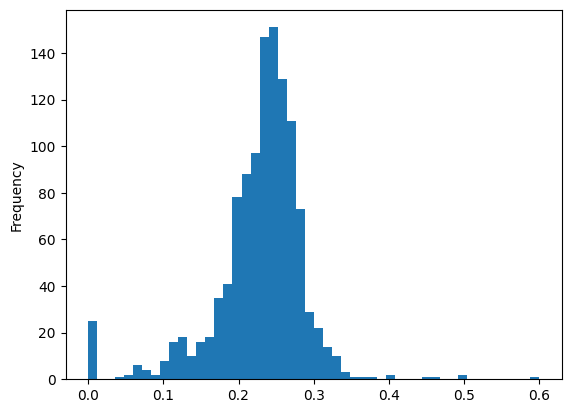

In [77]:
# Visualize the distribution of games played (G)
display(df_merged['AVG'].describe())

df_merged['AVG'].plot.hist(bins=50)

,AVG
count,1132.000000
mean,0.231572
std,0.047292
min,0.045000
25%,0.208000
50%,0.238000
75%,0.262000
max,0.380000


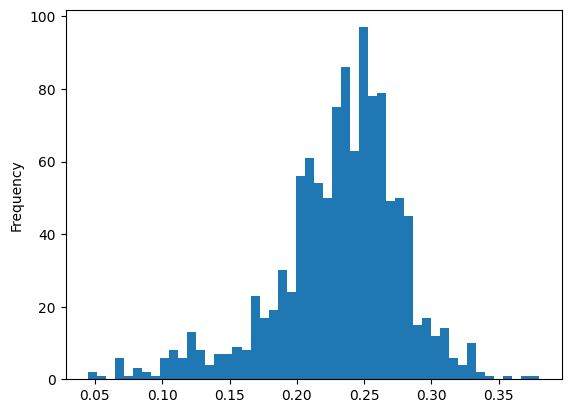

In [78]:
# It appears we have outliers at 0.4 and above, and at 0
df_merged = df_merged[(df_merged['AVG'] > 0.0) & (df_merged['AVG'] < 0.4)]
df_merged['AVG'].plot.hist(bins=50)
df_merged['AVG'].describe()

,G
count,1132.000000
mean,77.321555
std,52.118217
min,1.000000
25%,27.000000
50%,75.500000
75%,122.000000
max,162.000000


<Axes: ylabel='Frequency'>

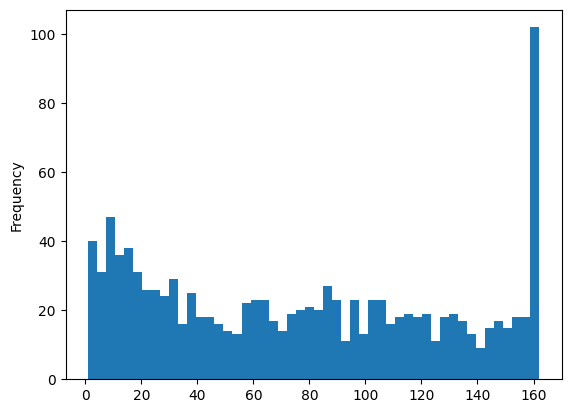

In [79]:
# Next, we will filter by games.
display(df_merged['G'].describe())

df_merged['G'].plot.hist(bins=50)

,G
count,909.000000
mean,93.720572
std,44.827042
min,21.000000
25%,56.000000
50%,92.000000
75%,132.000000
max,162.000000


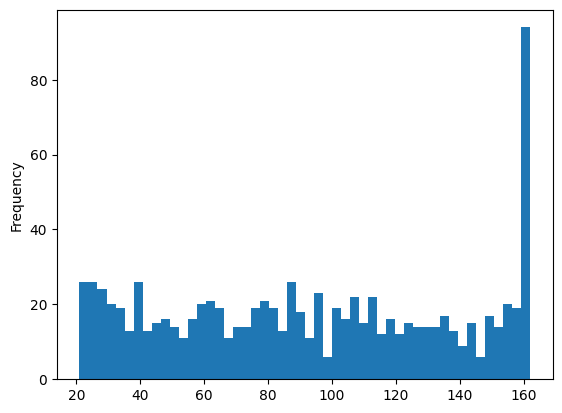

In [80]:
# There are not any clear outliers. We can pick an arbitrary value,
# maybe 20 games (roughly 80 plate appearances), to remove players with
# too small a sample size to accurately analyze their contribution to
# a team's offensive success
df_merged = df_merged[df_merged['G'] > 20]
df_merged['G'].plot.hist(bins=50)
display(df_merged['G'].describe())

,AVG
count,909.000000
mean,0.240366
std,0.035329
min,0.119000
25%,0.218000
50%,0.243000
75%,0.264000
max,0.354000


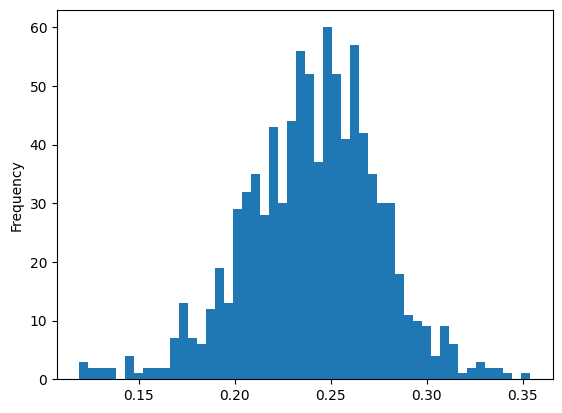

In [81]:
# Check the AVG and see what's changed
df_merged['AVG'].plot.hist(bins=50)
display(df_merged['AVG'].describe())

In [82]:
# This looks much better, we will export this as our cleaned, merged, and wrangled
# dataset

df_merged.to_csv('mlb-player-stats-Batters-2023-2024-cleaned.csv', index=False)